In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain
from more_itertools import unique_everseen
import sets
import time
from wordcloud import WordCloud

In [44]:
songs = pd.read_csv('FinalData_1.csv')
songs = songs[songs['Year']>=1960]

In [45]:
songs['Danceability'] = pd.cut(songs['Danceability'], bins=[-1, 0.33, 0.66, float('Inf')], labels=['LowDanceability', 'MediumDanceability', 'HighDanceability'])

In [46]:
songs['Energy'] = pd.cut(songs['Energy'], bins=[0, 0.5, float('Inf')], labels=['LowEnergy', 'HighEnergy'])

In [47]:
songs['Instrumentalness'] = pd.cut(songs['Instrumentalness'], bins=[-1, 0.5, 1.0], labels=['LowInstrumentalness', 'HighInstrumentalness'])

In [48]:
songs['Acousticness'] = pd.cut(songs['Acousticness'], bins=[-1, 0.33, 0.66, float('Inf')], labels=['LowAcousticness', 'MediumAcousticness' ,'HighAcousticness'])

In [49]:
songs['Loudness'] = pd.cut(songs['Loudness'], bins=[-60, -8, float('Inf')], labels=['Loud', 'Soft'])

In [50]:
songs['Speechiness'] = pd.cut(songs['Speechiness'], bins=[-1, 0.031, 0.038, float('Inf')], labels=['LessVocal', 'Music&Speech', 'MoreVocal'])

In [51]:
songs['Liveness'] = pd.cut(songs['Liveness'], bins=[-1, 0.8, float('Inf')], labels=['NoAudience', 'LiveAudience'])

In [52]:
songs['Valence'] = pd.cut(songs['Valence'], bins=[-1, 0.5 , float('Inf')], labels=['Sad', 'Cheerful'])

In [53]:
songs['Tempo'] = pd.cut(songs['Tempo'], bins=[-1, 100, 135, float('Inf')], labels=['LowTempo', 'MediumTempo', 'HighTempo'])

In [54]:
for idx, row in songs.iterrows():
    if  songs.loc[idx,'Mode'] == 0:
        songs.loc[idx,'Mode'] = 'MinorModality'
    elif songs.loc[idx,'Mode'] == 1:
        songs.loc[idx,'Mode'] = 'MajorModality'

In [55]:
for idx, row in songs.iterrows():
    if  songs.loc[idx,'Key'] == 0:
        songs.loc[idx,'Key'] = 'C'
    elif songs.loc[idx,'Key'] == 1:
        songs.loc[idx,'Key'] = 'C#'
    elif songs.loc[idx,'Key'] == 2:
        songs.loc[idx,'Key'] = 'D'
    elif songs.loc[idx,'Key'] == 3:
        songs.loc[idx,'Key'] = 'D#'
    elif songs.loc[idx,'Key'] == 4:
        songs.loc[idx,'Key'] = 'E'
    elif songs.loc[idx,'Key'] == 5:
        songs.loc[idx,'Key'] = 'F'
    elif songs.loc[idx,'Key'] == 6:
        songs.loc[idx,'Key'] = 'F#'
    elif songs.loc[idx,'Key'] == 7:
        songs.loc[idx,'Key'] = 'G'
    elif songs.loc[idx,'Key'] == 8:
        songs.loc[idx,'Key'] = 'G#'
    elif songs.loc[idx,'Key'] == 9:
        songs.loc[idx,'Key'] = 'A'
    elif songs.loc[idx,'Key'] == 10:
        songs.loc[idx,'Key'] = 'A#'
    else:
        songs.loc[idx,'Key'] = 'B'

In [56]:
songs_6070 = songs[(songs['Year']>=1960) & (songs['Year'] <1970)]
songs_7080 = songs[(songs['Year']>=1970) & (songs['Year'] <1980)]
songs_8090 = songs[(songs['Year']>=1980) & (songs['Year'] <1990)]
merge1 = songs_6070.append([songs_7080, songs_8090])
songs_9000 = songs[(songs['Year']>=1990) & (songs['Year'] <2000)]
songs_0010 = songs[(songs['Year']>=2000) & (songs['Year'] <2010)]
songs_1020 = songs[(songs['Year']>=2010) & (songs['Year'] <2020)]
merge2 = songs_9000.append([songs_0010, songs_1020])

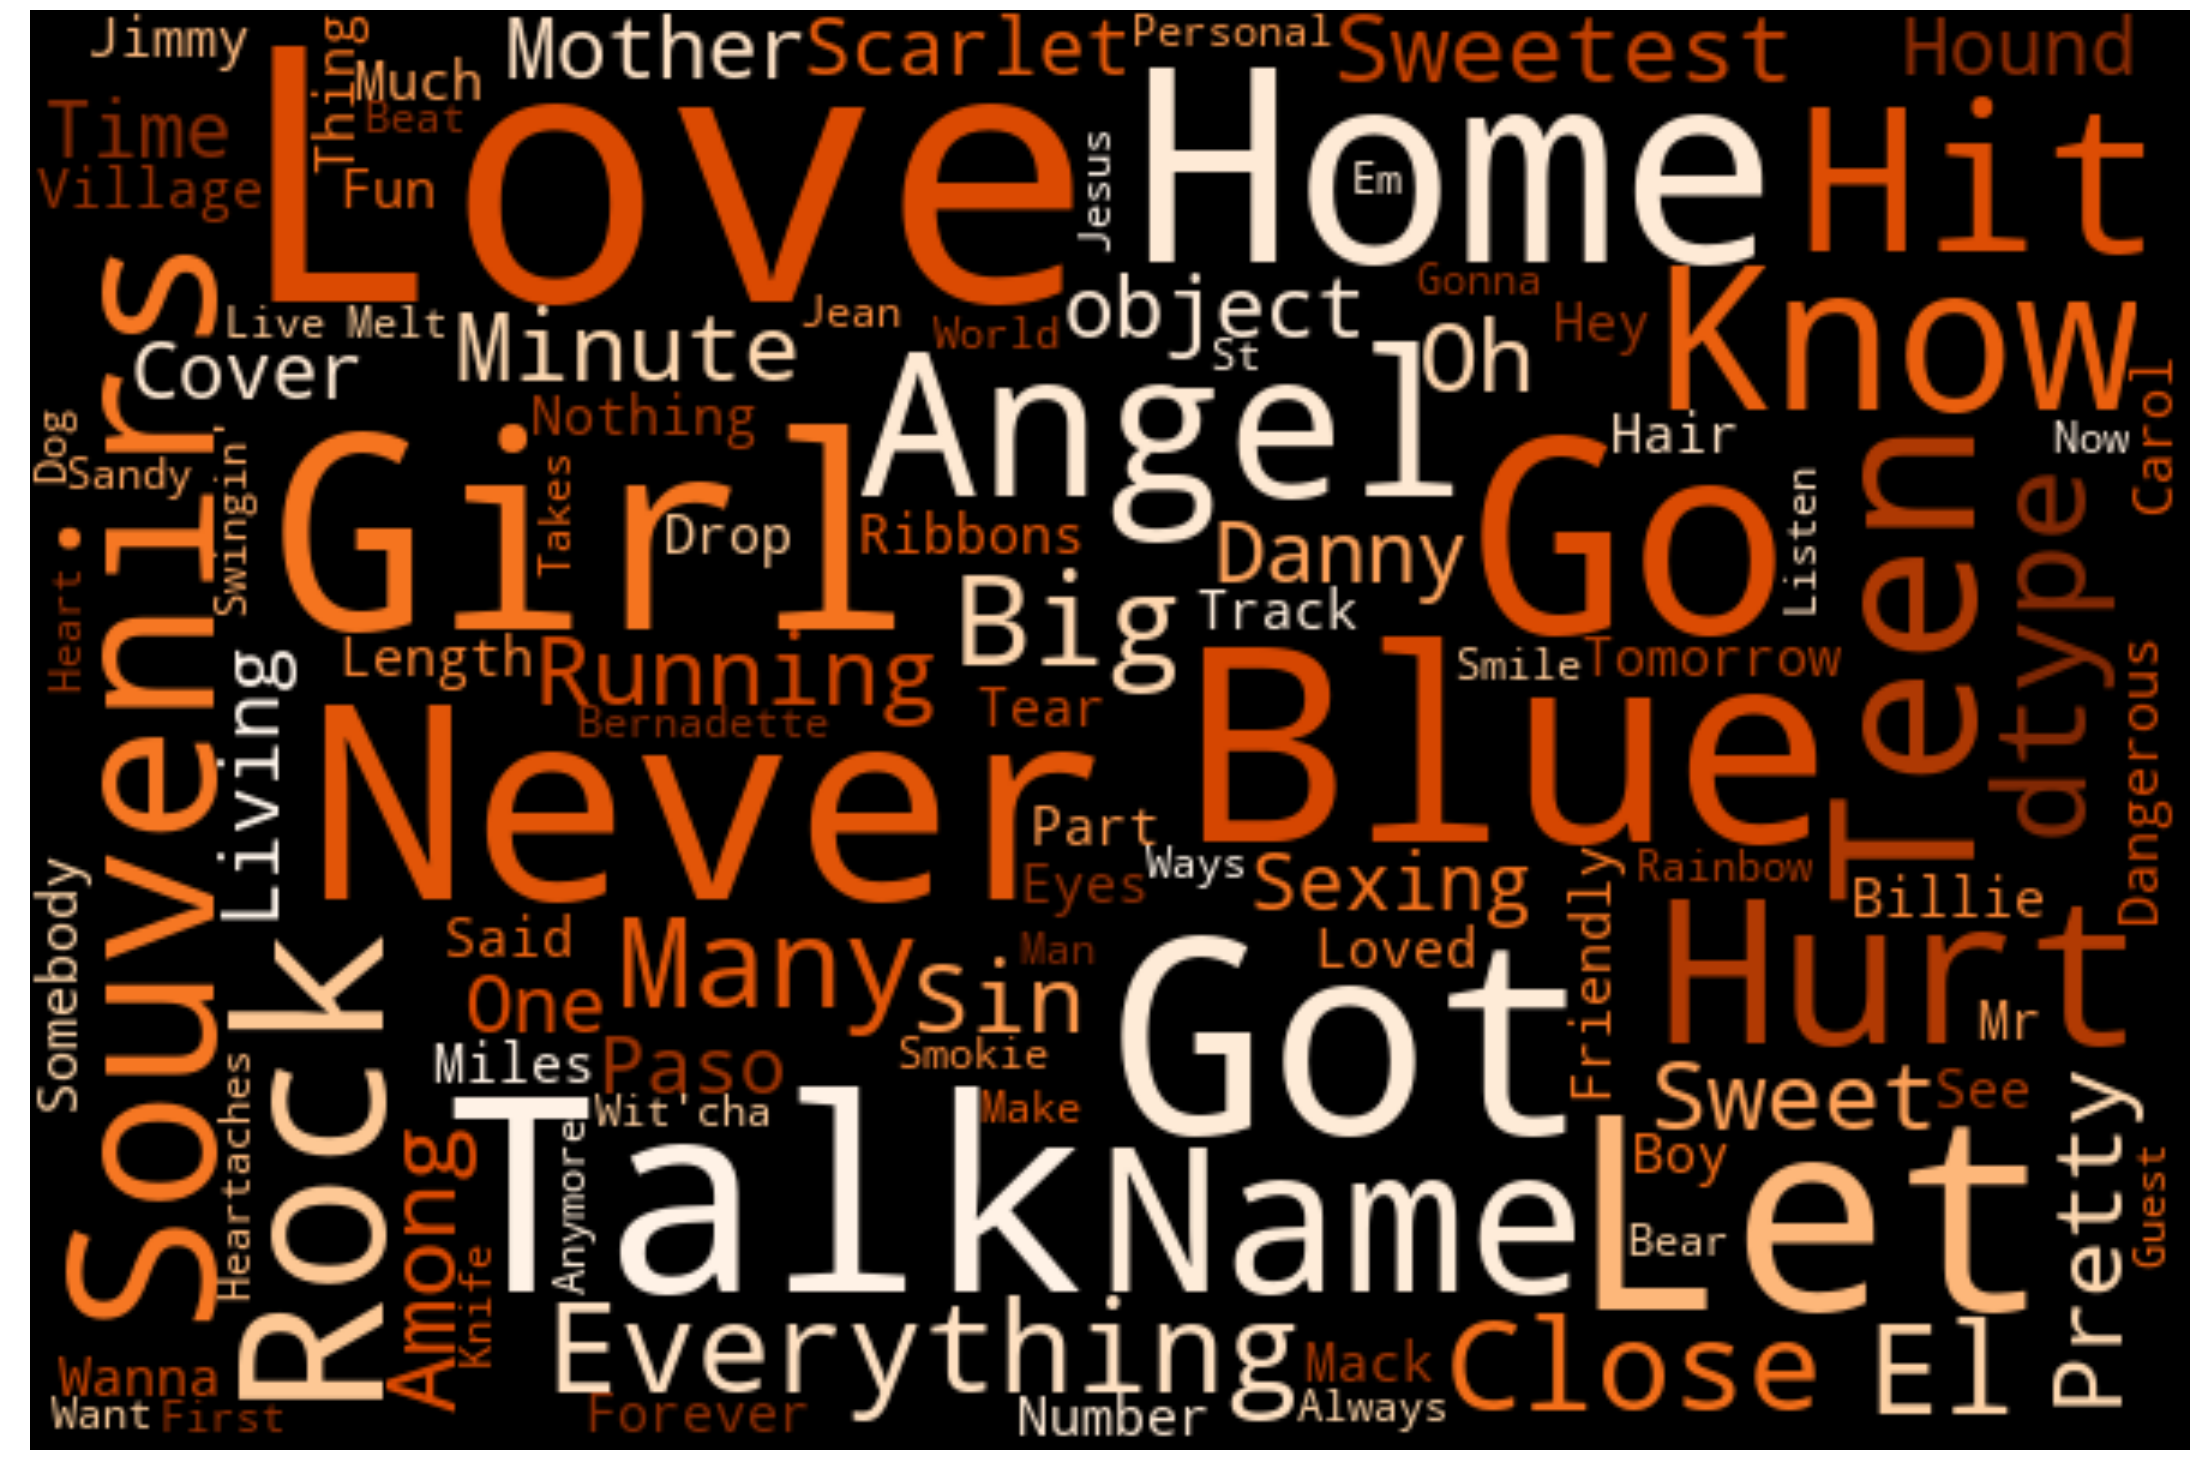

In [67]:
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42,
                          collocations = False
                         ).generate(str(merge1['Track']))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.savefig('early.png')

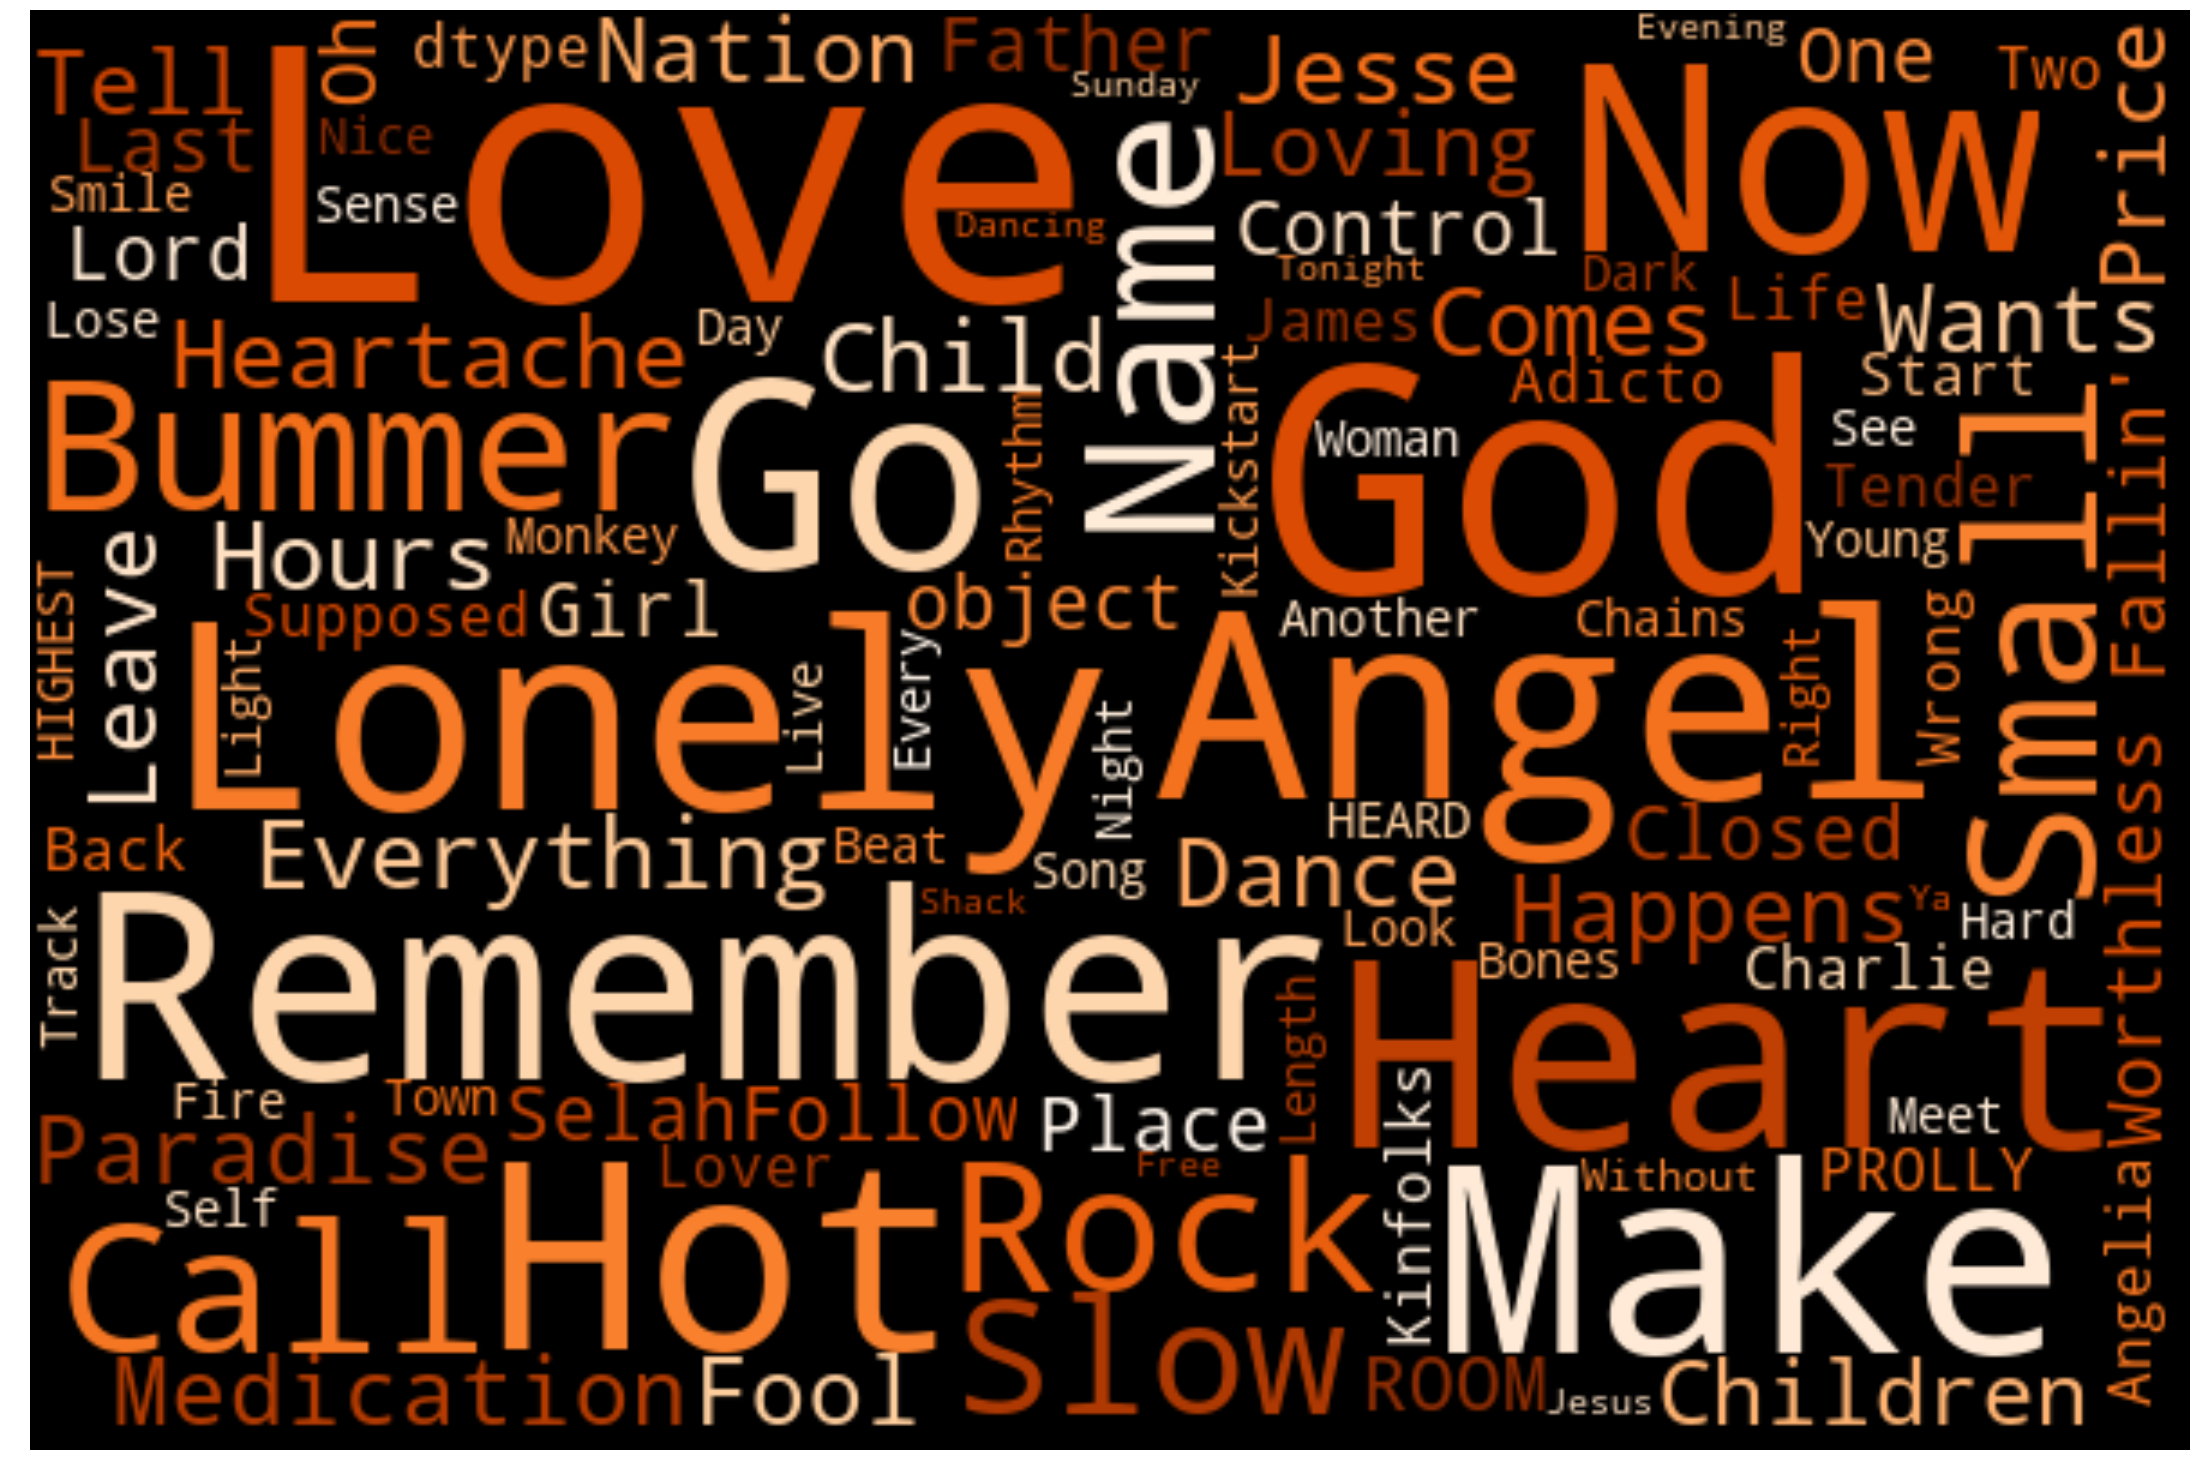

In [68]:
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42,
                         collocations = False

                         ).generate(str(merge2['Track']))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.savefig('lte.png')

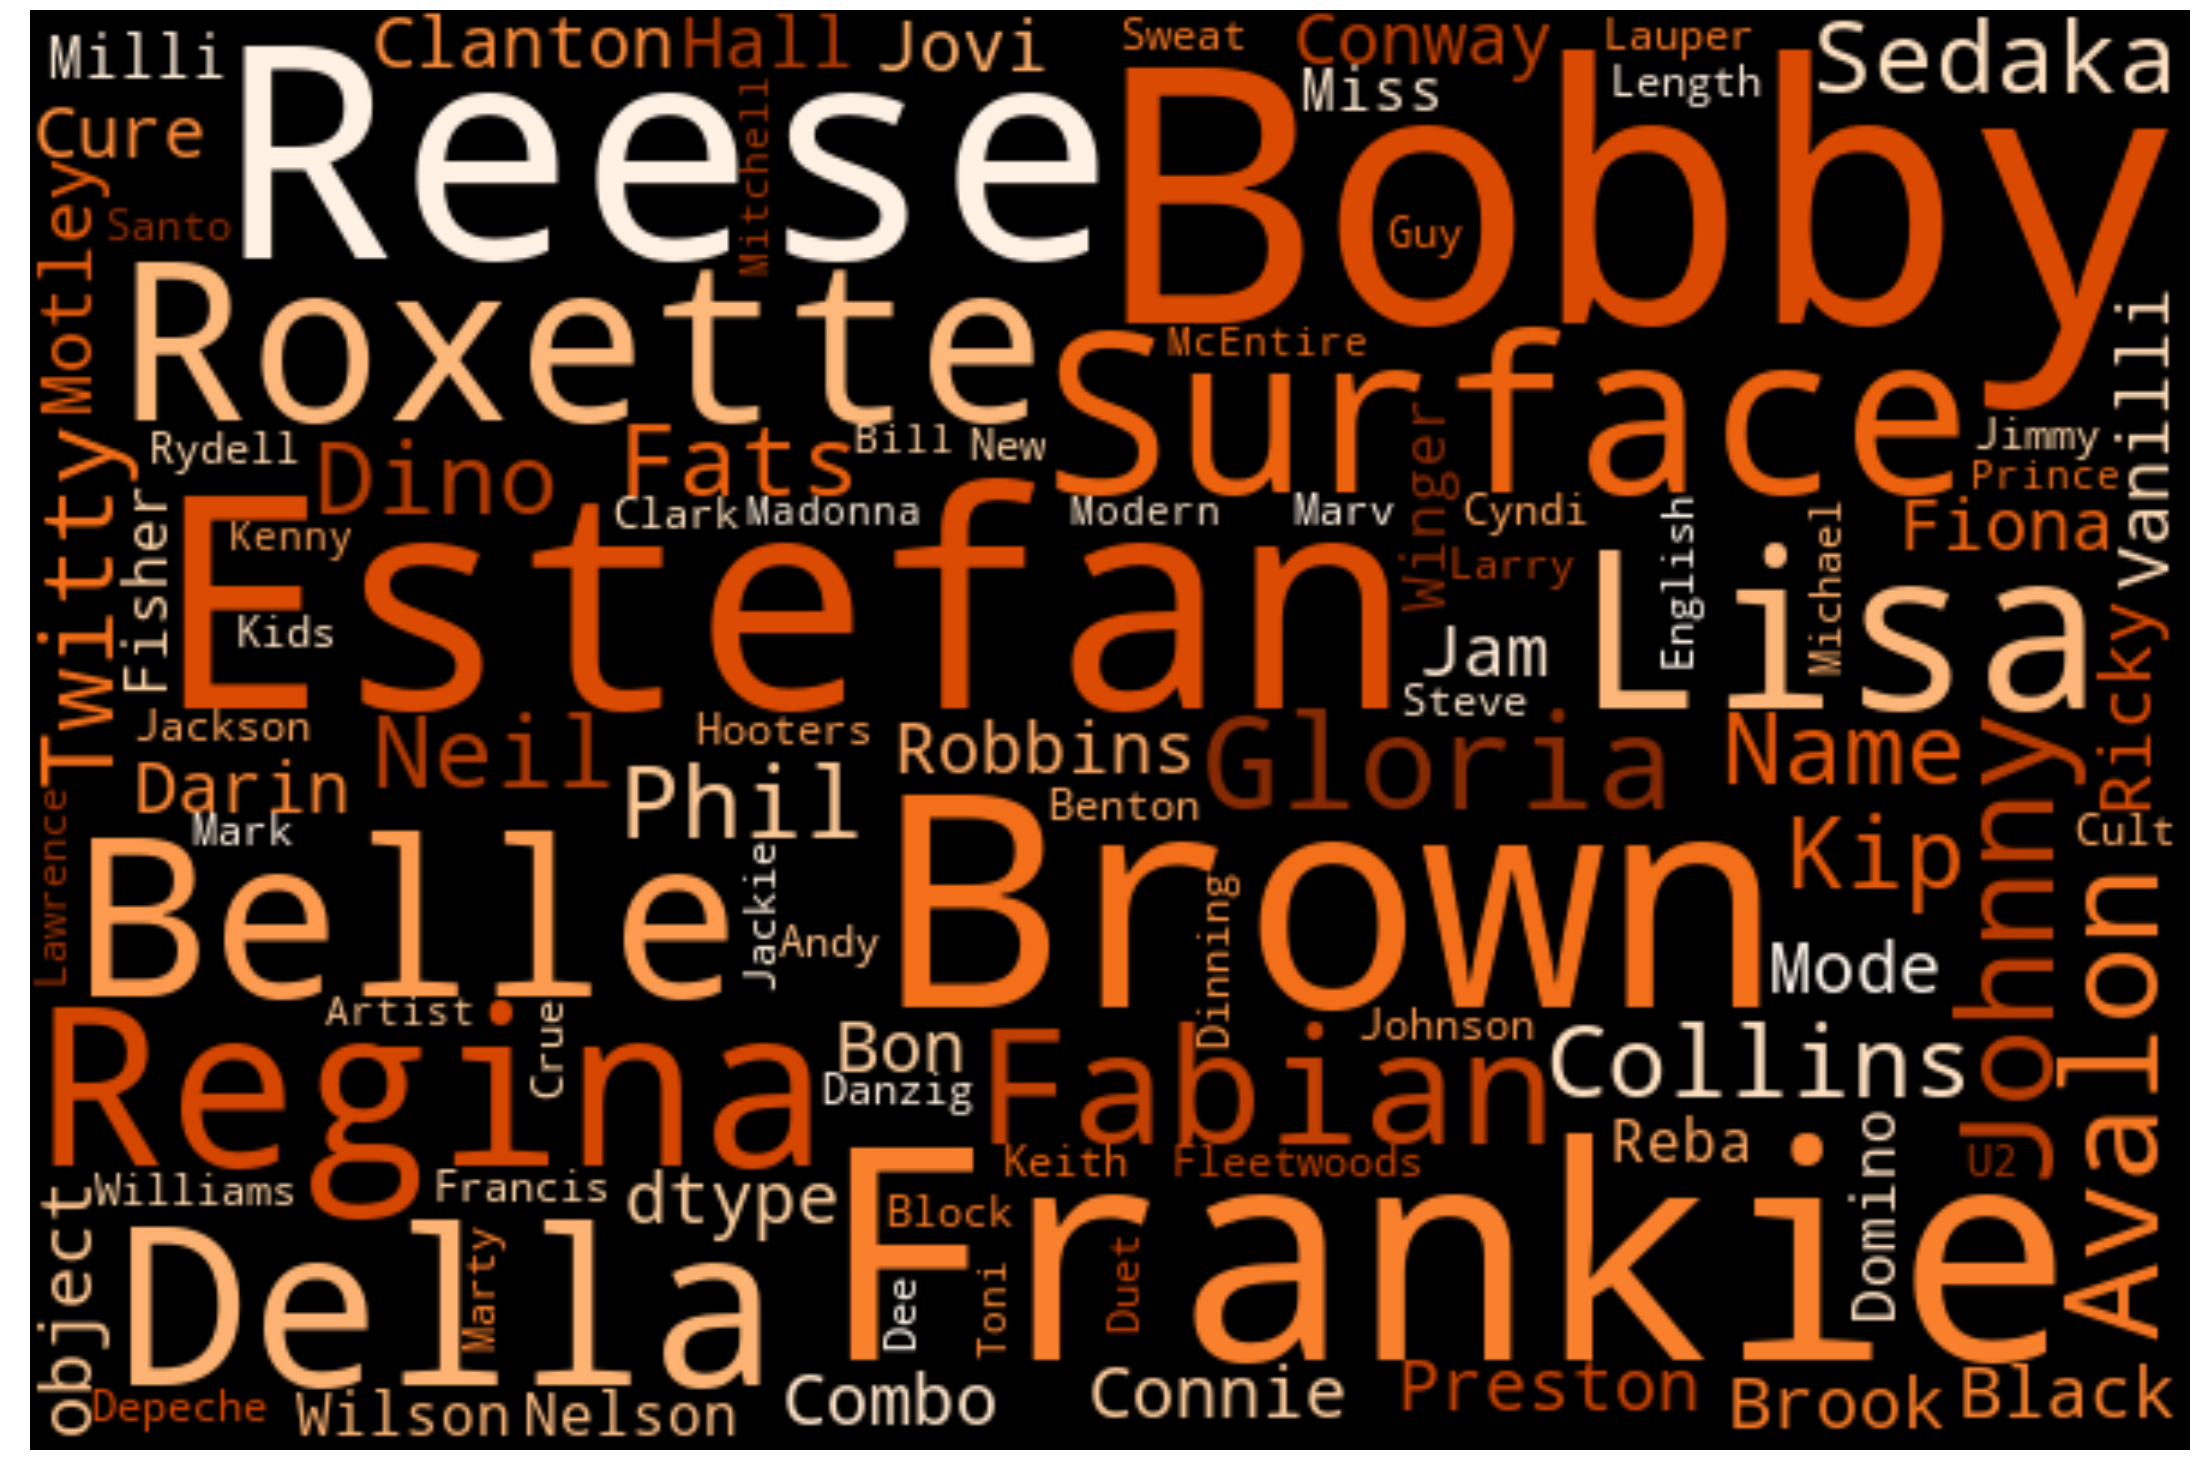

In [69]:
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42,
                          collocations = False
                         ).generate(str(merge1['Artist']))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.savefig('artistearly.png')

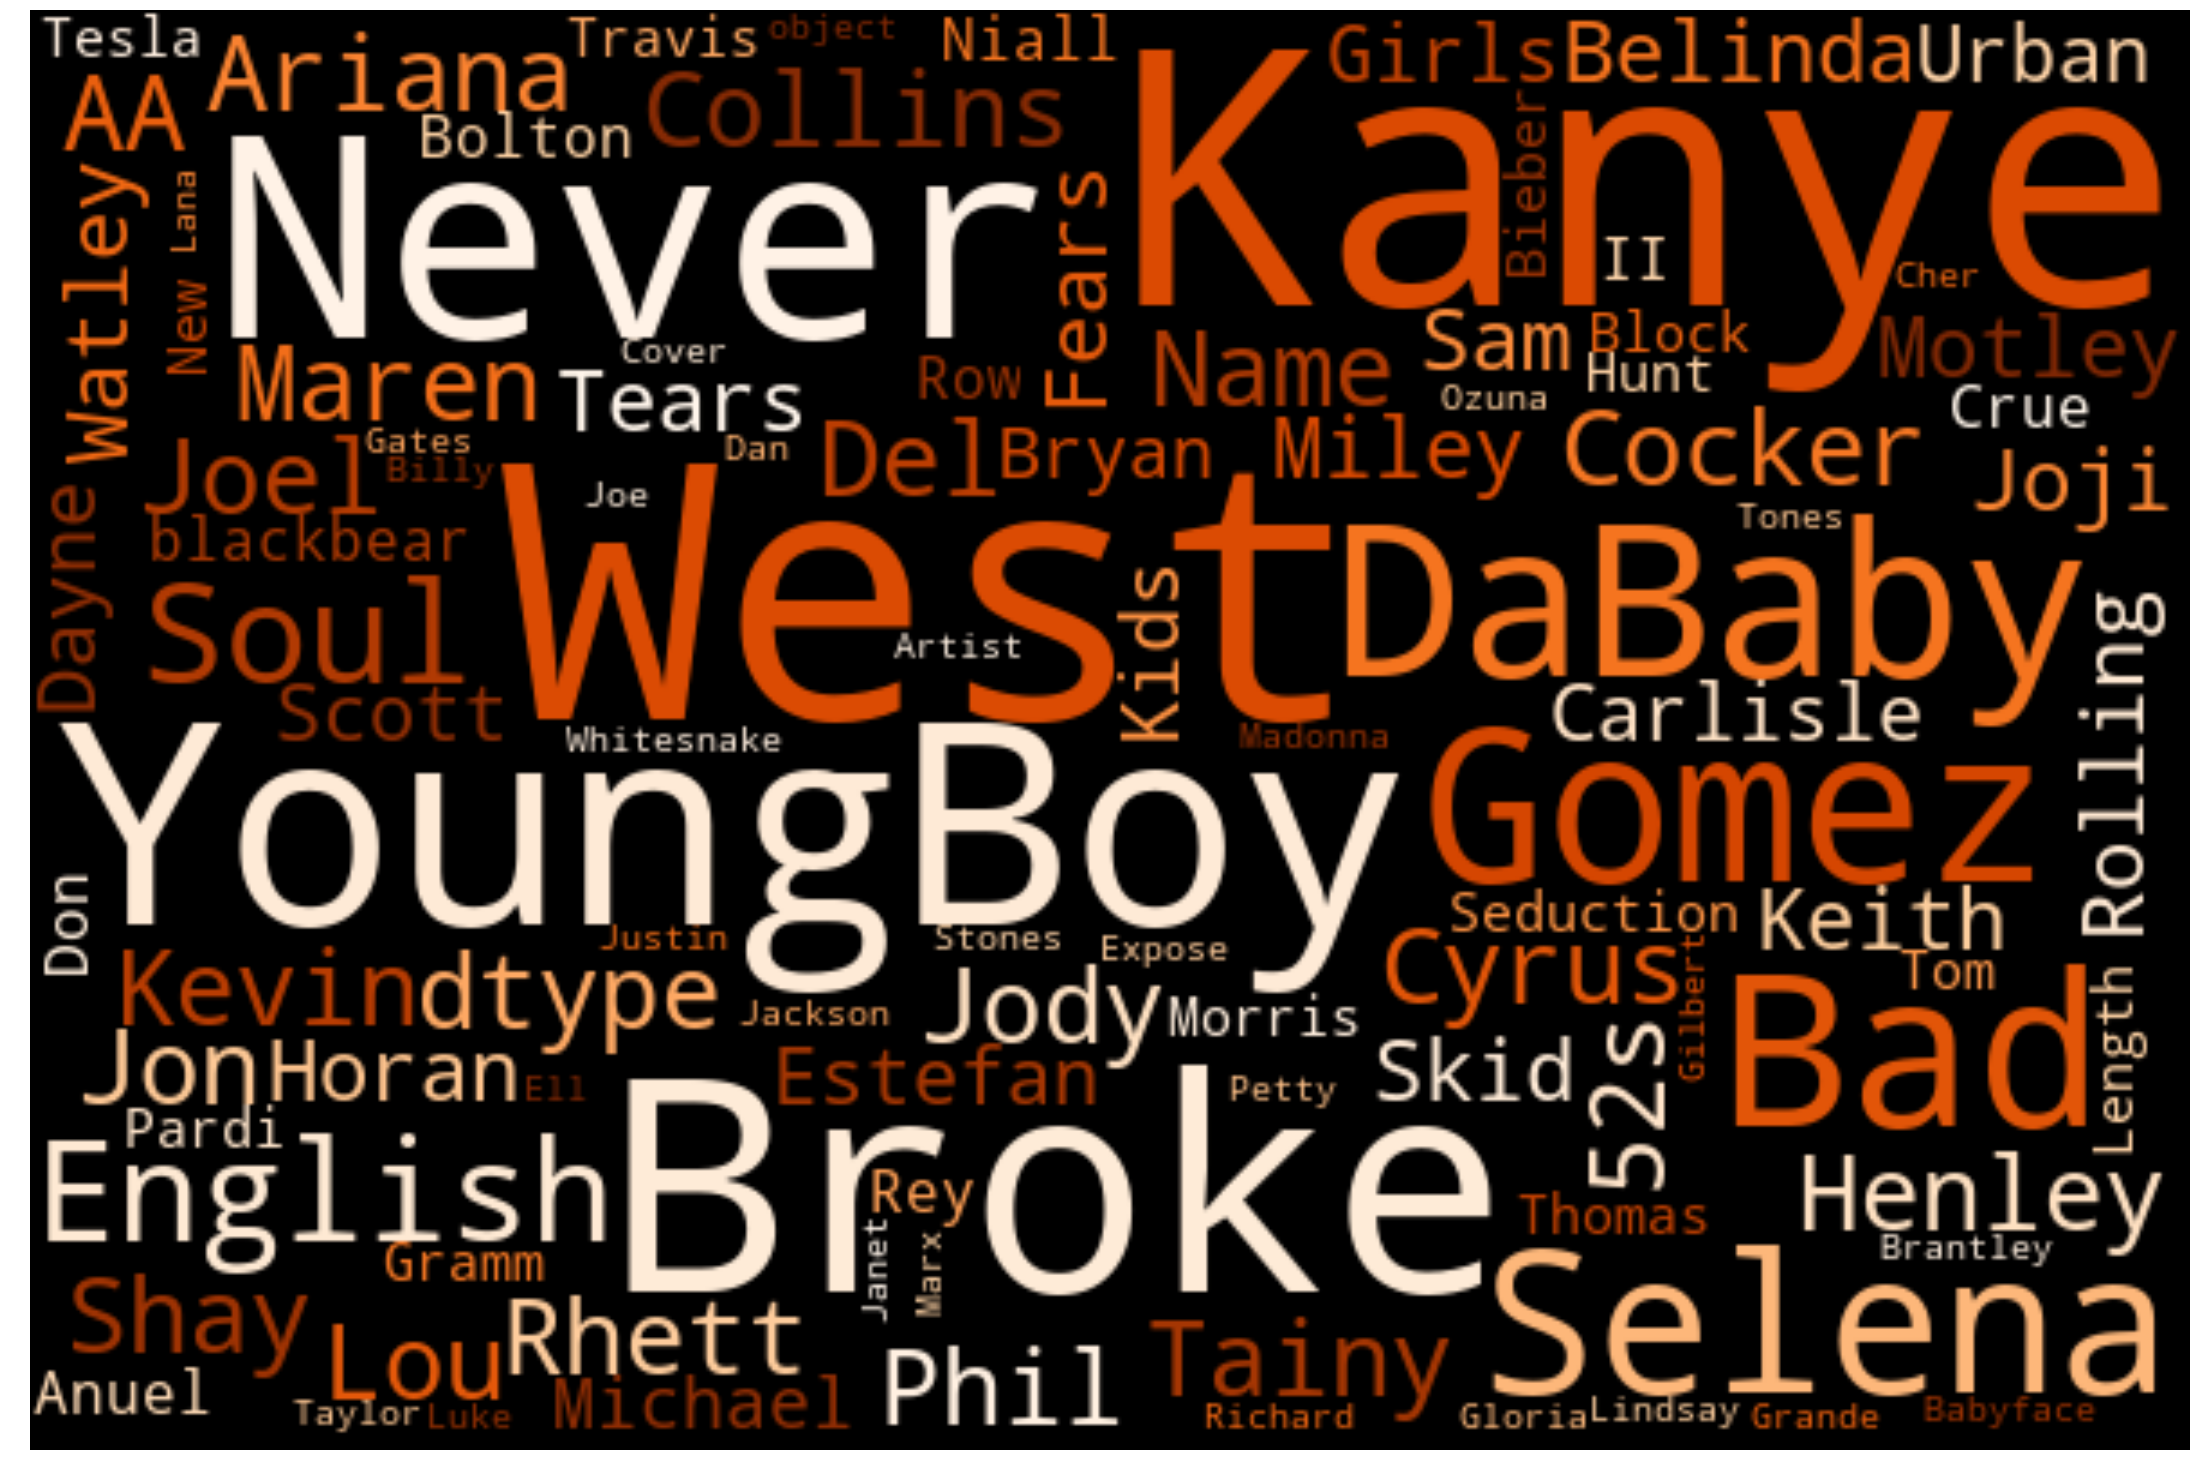

In [70]:
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42,
                          collocations = False
                         ).generate(str(merge2['Artist']))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.savefig('artistlate.png')